In [43]:
import pandas as pd 
import re
import numpy as np
import skfuzzy as fuzz
import nltk
from nltk.corpus import stopwords
#!pip install seaborn
import seaborn as sns


from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import numpy as np

np.random.seed(1337)  # for reproducibility
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from dbn import SupervisedDBNClassification
#from dbn.tensorflow import SupervisedDBNClassification
# use "from dbn import SupervisedDBNClassification" for computations on CPU with numpy


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/stark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ModuleNotFoundError: No module named 'dbn'

In [2]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv")

In [35]:
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
z = df.iloc[:,0]

In [38]:
z.unique()

array([0, 4])

In [12]:
df.head()

X =  df.iloc[:,1]

In [13]:
Y = df.iloc[:,-1]
Y

0          is upset that he can't update his Facebook by ...
1          @Kenichan I dived many times for the ball. Man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @Kwesidei not the whole crew 
                                 ...                        
1599994    Just woke up. Having no school is the best fee...
1599995    TheWDB.com - Very cool to hear old Walt interv...
1599996    Are you ready for your MoJo Makeover? Ask me f...
1599997    Happy 38th Birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @theNSPCC @SparksCharity...
Name: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D, Length: 1599999, dtype: object

In [14]:
df1 = df.iloc[:,:2]

In [15]:
df1.columns = ["id","text"]

In [16]:
df1.id = X
df1.text = Y

In [17]:
df1

,id,text
0,1467810672,is upset that he can't update his Facebook by ...
1,1467810917,@Kenichan I dived many times for the ball. Man...
2,1467811184,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all...."
4,1467811372,@Kwesidei not the whole crew
...,...,...
1599994,2193601966,Just woke up. Having no school is the best fee...
1599995,2193601969,TheWDB.com - Very cool to hear old Walt interv...
1599996,2193601991,Are you ready for your MoJo Makeover? Ask me f...
1599997,2193602064,Happy 38th Birthday to my boo of alll time!!! ...


In [18]:
def clean(text_):
    
    
    text = text_
    text = text.lower
    #text = [word for word in text if word not in stopwords]
    text = re.sub('<[^<]+?>','', text)
    text = ''.join(c for c in text if not c.isdigit())
    text = ''.join(c for c in text if c not in punctuation)

    wordnet_lemmatizer = WordNetLemmatizer()
  
    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]

      #text = nltk.word_tokenize(text)
  
    return text


In [19]:
sid = SentimentIntensityAnalyzer()



In [20]:
ls = sid.polarity_scores(df1.text[0])
ls

{'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.75}

In [21]:
for i in ls :
    print (i,ls.get(i))

neg 0.303
neu 0.697
pos 0.0
compound -0.75


In [22]:
df2 = df1.id.copy()

In [23]:
df_m = df1.iloc[:50,:]

In [24]:
df_m

,id,text
0,1467810672,is upset that he can't update his Facebook by ...
1,1467810917,@Kenichan I dived many times for the ball. Man...
2,1467811184,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all...."
4,1467811372,@Kwesidei not the whole crew
5,1467811592,Need a hug
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...
7,1467811795,@Tatiana_K nope they didn't have it
8,1467812025,@twittera que me muera ?
9,1467812416,spring break in plain city... it's snowing


In [25]:
neg = []
neu = []
pos = []
com = []
#df2["neu"] = df1.id
#df2["pos"] = df1.id

for i in range (len(df_m)):
    ls = sid.polarity_scores(df_m.text[i])
    neg.append(ls['neg'])
    neu.append(ls['neu'])
    pos.append(ls['pos'])
    com.append(ls['compound'])
    
    
    

In [26]:
df_m["neg"] = neg
df_m["neu"] = neu
df_m["pos"] = pos
df_m["compound"] = com

In [31]:
df_m["orign"] = z.iloc[:50]

In [33]:
z.iloc[:50]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: 0, dtype: int64

In [20]:
# Generate universe variables
#   * pos and neg on subjective ranges [0, 1]
#   * op has a range of [0, 10] in units of percentage points
x_p = np.arange(0, 1, 0.1)
x_n = np.arange(0, 1, 0.1)
x_op = np.arange(0, 10, 1)

In [21]:
# Generate fuzzy membership functions
p_lo = fuzz.trimf(x_p, [0, 0, 0.5])
p_md = fuzz.trimf(x_p, [0, 0.5, 1])
p_hi = fuzz.trimf(x_p, [0.5, 1, 1])
n_lo = fuzz.trimf(x_n, [0, 0, 0.5])
n_md = fuzz.trimf(x_n, [0, 0.5, 1])
n_hi = fuzz.trimf(x_n, [0.5, 1, 1])
op_Neg = fuzz.trimf(x_op, [0, 0, 5])  # Scale : Neg Neu Pos
op_Neu = fuzz.trimf(x_op, [0, 5, 10])
op_Pos = fuzz.trimf(x_op, [5, 10, 10])

In [22]:
sentiment_val=[]
sentiment = []
sentiment_doc=[]
for j in range(len(df_m)):
    #sentiment_doc.append(senti[j])
    ss = sid.polarity_scores(df_m.text[j])
    posscore=ss['pos']
    negscore=ss['neg']
    neuscore=ss['neu']
    compoundscore=ss['compound']
   
    
    
    #print("\nPositive Score for each  tweet :")    
    if (posscore==1):
        posscore=0.9 
    else:
        posscore=round(posscore,1)
    print(posscore)

    #print("\nNegative Score for each  tweet :")
    if (negscore==1):
        negscore=0.9
    else:
        negscore=round(negscore,1)
    #print(negscore)

# We need the activation of our fuzzy membership functions at these values.
    p_level_lo = fuzz.interp_membership(x_p, p_lo, posscore)
    p_level_md = fuzz.interp_membership(x_p, p_md, posscore)
    p_level_hi = fuzz.interp_membership(x_p, p_hi, posscore)
    
    n_level_lo = fuzz.interp_membership(x_n, n_lo, negscore)
    n_level_md = fuzz.interp_membership(x_n, n_md, negscore)
    n_level_hi = fuzz.interp_membership(x_n, n_hi, negscore)
    
    # Now we take our rules and apply them. Rule 1 concerns bad food OR nice.
    # The OR operator means we take the maximum of these two.
    active_rule1 = np.fmin(p_level_lo, n_level_lo)
    active_rule2 = np.fmin(p_level_md, n_level_lo)
    active_rule3 = np.fmin(p_level_hi, n_level_lo)
    active_rule4 = np.fmin(p_level_lo, n_level_md)
    active_rule5 = np.fmin(p_level_md, n_level_md)
    active_rule6 = np.fmin(p_level_hi, n_level_md)
    active_rule7 = np.fmin(p_level_lo, n_level_hi)
    active_rule8 = np.fmin(p_level_md, n_level_hi)
    active_rule9 = np.fmin(p_level_hi, n_level_hi)
    
    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`
    
    n1=np.fmax(active_rule4,active_rule7)
    n2=np.fmax(n1,active_rule8)     
    op_activation_lo = np.fmin(n2,op_Neg)
    
    neu1=np.fmax(active_rule1,active_rule5)
    neu2=np.fmax(neu1,active_rule9)     
    op_activation_md = np.fmin(neu2,op_Neu)
    
    p1=np.fmax(active_rule2,active_rule3)
    p2=np.fmax(p1,active_rule6)   
    op_activation_hi = np.fmin(p2,op_Pos)
    
    op0 = np.zeros_like(x_op)
    
    # Aggregate all three output membership functions together
    aggregated = np.fmax(op_activation_lo,
                         np.fmax(op_activation_md, op_activation_hi))
    
    # Calculate defuzzified result
    op = fuzz.defuzz(x_op, aggregated, 'centroid')
    output=round(op,2)

    op_activation = fuzz.interp_membership(x_op, aggregated, op)  # for plot


    

    print("\nFiring Strength of Negative (wneg): "+str(round(n2,4)))
    print("Firing Strength of Neutral (wneu): "+str(round(neu2,4)))
    print("Firing Strength of Positive (wpos): "+str(round(p2,4)))
    
    print("\nResultant consequents MFs:" )
    print("op_activation_low: "+str(op_activation_lo))
    print("op_activation_med: "+str(op_activation_md))
    print("op_activation_high: "+str(op_activation_hi))
    
    print("\nAggregated Output: "+str(aggregated))

    print("\nDefuzzified Output: "+str(output))



    if 0<(output)<4.55:    # R
        print("\nOutput after Defuzzification: Negative")
        sentiment.append("Negative")
        sentiment_val.append('0')
   
    elif 4.56<(output)<10:
        print("\nOutput after Defuzzification: Positive")
        sentiment.append("Positive")
        sentiment_val.append('1')
        
        
        
     

0.0

Firing Strength of Negative (wneg): 0.6
Firing Strength of Neutral (wneu): 0.4
Firing Strength of Positive (wpos): 0.0

Resultant consequents MFs:
op_activation_low: [0.6 0.6 0.6 0.4 0.2 0.  0.  0.  0.  0. ]
op_activation_med: [0.  0.2 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.2]
op_activation_high: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Aggregated Output: [0.6 0.6 0.6 0.4 0.4 0.4 0.4 0.4 0.4 0.2]

Defuzzified Output: 3.99

Output after Defuzzification: Negative
0.2

Firing Strength of Negative (wneg): 0.0
Firing Strength of Neutral (wneu): 0.6
Firing Strength of Positive (wpos): 0.4

Resultant consequents MFs:
op_activation_low: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
op_activation_med: [0.  0.2 0.4 0.6 0.6 0.6 0.6 0.6 0.4 0.2]
op_activation_high: [0.  0.  0.  0.  0.  0.  0.2 0.4 0.4 0.4]

Aggregated Output: [0.  0.2 0.4 0.6 0.6 0.6 0.6 0.6 0.4 0.4]

Defuzzified Output: 4.98

Output after Defuzzification: Positive
0.2

Firing Strength of Negative (wneg): 0.6
Firing Strength of Neutral (wneu): 0.4
Firing S

In [23]:
df_m["sentiment_val"]=sentiment_val

In [24]:
df_m["sentiment"] = sentiment

In [25]:
df_m.head()

,id,text,neg,neu,pos,compound,sentiment_val,sentiment
0,1467810672,is upset that he can't update his Facebook by ...,0.303,0.697,0.000,-0.7500,0,Negative
1,1467810917,@Kenichan I dived many times for the ball. Man...,0.000,0.833,0.167,0.4939,1,Positive
2,1467811184,my whole body feels itchy and like its on fire,0.321,0.500,0.179,-0.2500,0,Negative
3,1467811193,"@nationwideclass no, it's not behaving at all....",0.241,0.759,0.000,-0.6597,0,Negative
4,1467811372,@Kwesidei not the whole crew,0.000,1.000,0.000,0.0000,1,Positive


<AxesSubplot:ylabel='count'>

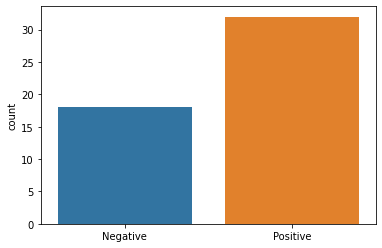

In [31]:

sns.countplot(sentiment)

In [32]:
def preprocess_text(sen):
    
   
    sentence = remove_tags(sen) 
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [34]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [36]:
X = []
sentences = list(df_m['text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [37]:
y = df_m['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [38]:
#Lets train our model now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [39]:
#word cleaning , tokenize
#Sentence Clean
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
#X_train,Xtest tokenize
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
# loading glove 100d file
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
#print("Test Score:", score[0])
#print("Test Accuracy:", score[1])

In [ ]:

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Training
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=100,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)
classifier.fit(X_train, Y_train)

# Save the model
classifier.save('model.pkl')

# Restore it
classifier = SupervisedDBNClassification.load('model.pkl')

# Test
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))